## 회귀분석

### 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법

### 반면, 회귀분석은 (상관분석 + 예측)하는 통계적 기법
+ 수량형 값을 예측하는데 주로 사용되는 통계적 모형
+ 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고 독립변수가 주어지면 종속변수의 값이 얼마인지 추정

### 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 회귀방정식이라 함
+ $ \hat y = ax + b + \epsilon $
+ 회귀직선을 그릴때는 '최소제곱법'이라는 수학적 기법을 이용
+ R에서는 lm함수를 사용함 : lm(종속변수~독립변수)



In [1]:
# 전화판촉회수와 판매량의 관계를 통해 판촉횟수가 증가하면 판매량도 증가하는지 알아보세요

p <- c(96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84)

s <- c(41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30)

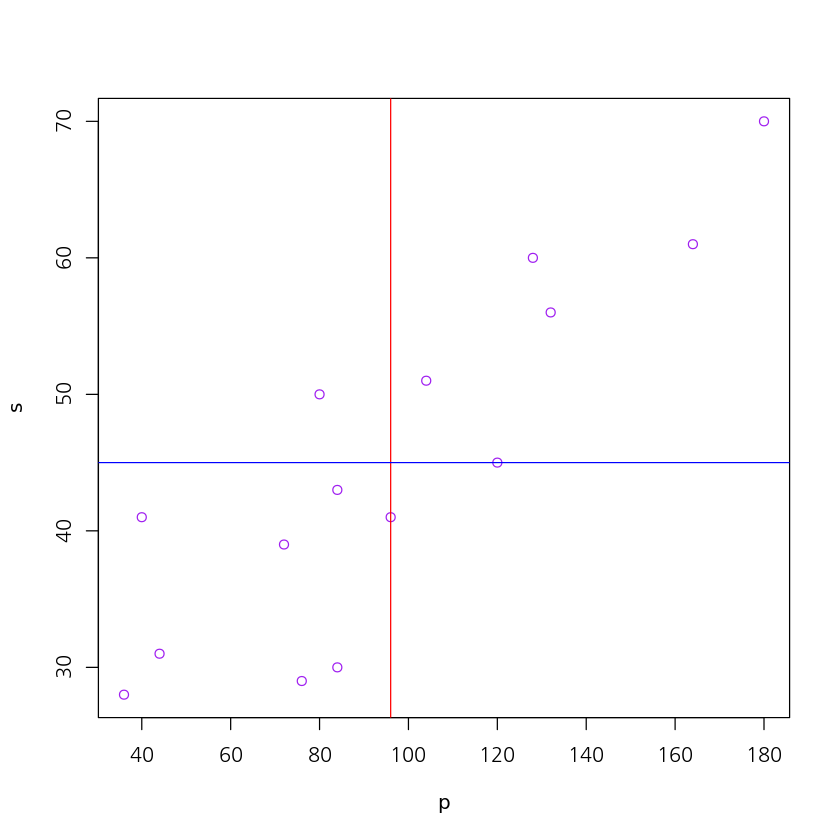

In [3]:
plot(p, s, col='purple')
abline(v=mean(p), col='red')
abline(h=mean(s), col='blue')

In [9]:
cor(p, s)
cov(p, s)  # 판촉전화횟수와 판매량이 양의 상관관계를 보임

[1] 0.8646318

[1] 476.5714

In [10]:
cor.test(p,s)


	Pearson's product-moment correlation

data:  p and s
t = 6.2051, df = 13, p-value = 3.193e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6325270 0.9542427
sample estimates:
      cor 
0.8646318 


In [6]:
install.packages('corrplot')

Installing package into ‘/home/hadoop/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [7]:
library(corrplot)

corrplot 0.90 loaded



## 선형방정식을 작성하려면 회귀계수(기울기, 절편)가 필요함
### 최소제곱법으로 계산가능, lm함수로 바로 구할수도 있음

In [13]:
lm(s~p)  # intercept - 절편  p = 기울기


Call:
lm(formula = s ~ p)

Coefficients:
(Intercept)            p  
    19.9800       0.2606  


### 회귀계수 : Coefficients
### 절편 : Intercept = 19.98
### 기울기 : p = 0.26
### 따라서, 선형방정식은 $y=0.26x + 19.98$ 

## 방정식의 의미

### 1) 방정식의 $x$ : 판촉전화 횟수
### 2) 19.98의 의미 : 판촉전화 횟수가 0일때 제품을 19.98만큼 팔 수 있다?
+ 판매수단이 판촉전화로 한정되었는지 여부에 따라 다름

### 3) 0.26$x$의 의미 : 판촉전화횟수가 1일때 제품을 0.26만큼 팔 수 있다
+ 독립변수가 주어졌을 때 종속변수의 변화량을 예측할 수 있음

### 선형방정식을 통해 계산된 예측값 시각화

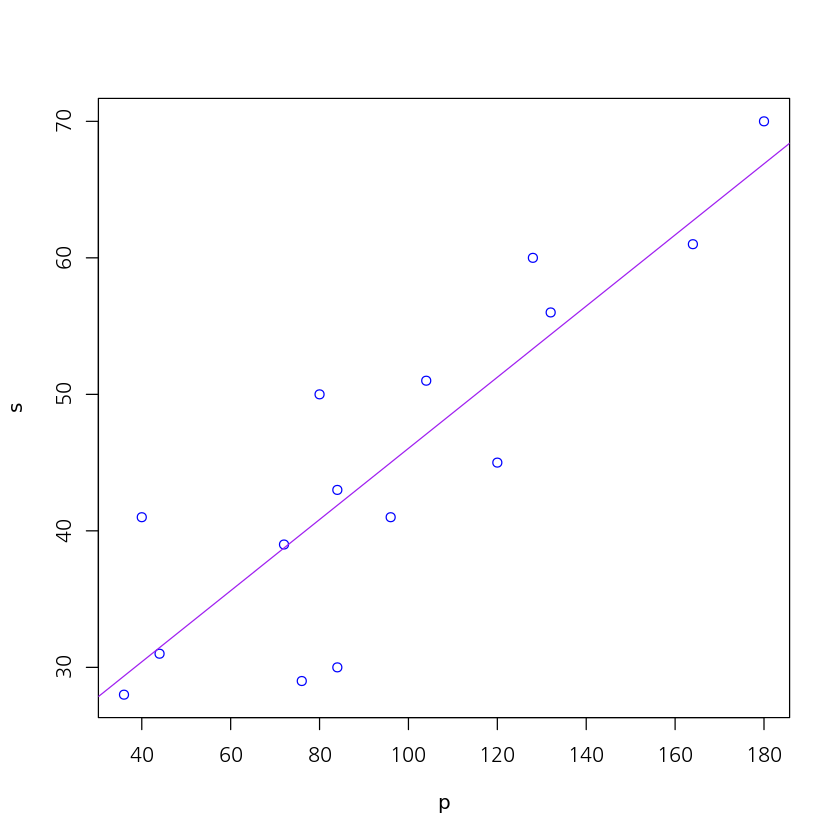

In [18]:
plot(p, s, col='blue')
abline(lm(s~p), col='purple')

In [19]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


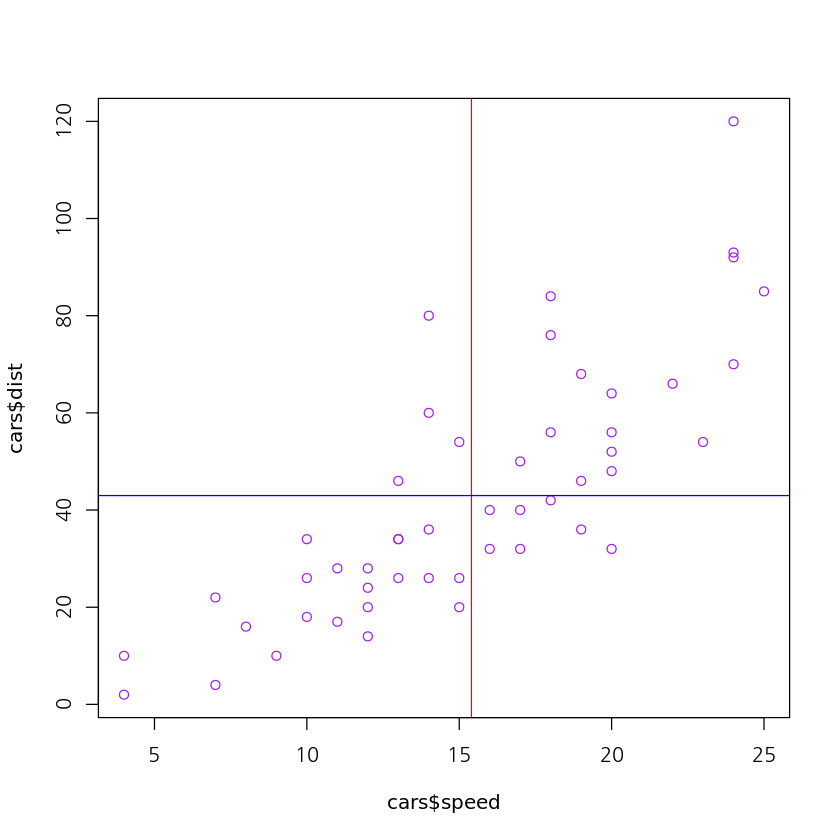

In [22]:
plot(cars$speed, cars$dist, col='purple')
abline(v=mean(cars$speed), col='red')
abline(h=mean(cars$dist), col='blue')

In [24]:
cor(cars$speed, cars$dist)
cov(cars$speed, cars$dist)

[1] 0.8068949

[1] 109.9469

In [25]:
cor.test(cars$speed, cars$dist)


	Pearson's product-moment correlation

data:  cars$speed and cars$dist
t = 9.464, df = 48, p-value = 1.49e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6816422 0.8862036
sample estimates:
      cor 
0.8068949 



Call:
lm(formula = cars$dist ~ cars$speed)

Coefficients:
(Intercept)   cars$speed  
    -17.579        3.932  


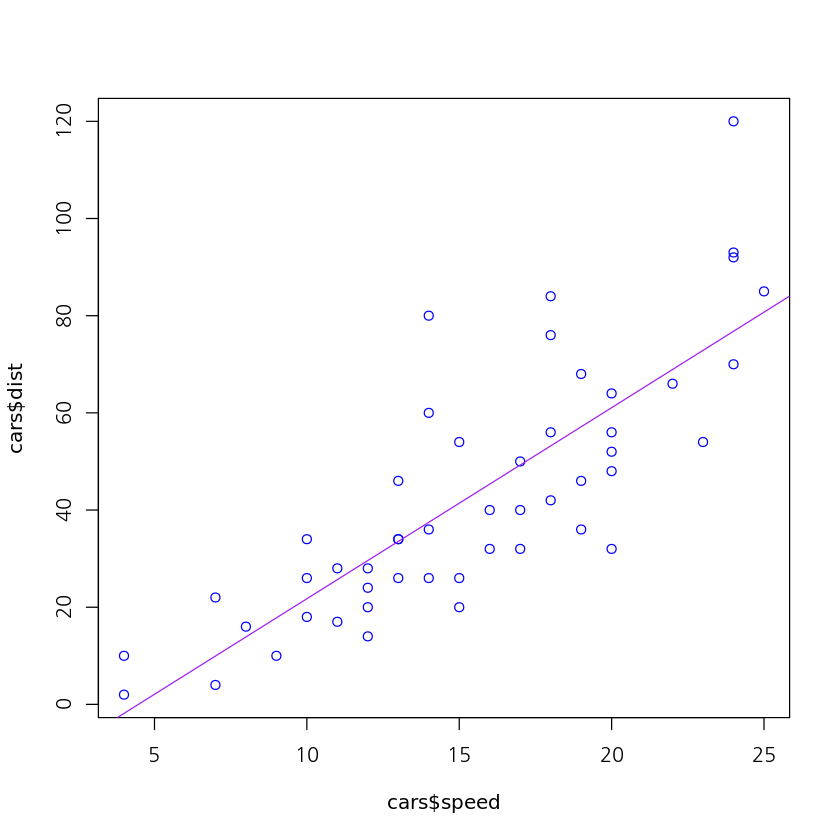

In [26]:
lm(cars$dist ~ cars$speed)
plot(cars$speed, cars$dist, col='blue')
abline(lm(cars$dist ~ cars$speed), col='purple')

$ \hat y = 3.932x -17.579 + \epsilon $

In [27]:
install.packages('MASS')

Installing package into ‘/home/hadoop/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message in install.packages("MASS"):
“installation of package ‘MASS’ had non-zero exit status”


In [28]:
library(MASS)

In [29]:
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


In [30]:
summary(ChickWeight)

     weight           Time           Chick     Diet   
 Min.   : 35.0   Min.   : 0.00   13     : 12   1:220  
 1st Qu.: 63.0   1st Qu.: 4.00   9      : 12   2:120  
 Median :103.0   Median :10.00   20     : 12   3:120  
 Mean   :121.8   Mean   :10.72   10     : 12   4:118  
 3rd Qu.:163.8   3rd Qu.:16.00   17     : 12          
 Max.   :373.0   Max.   :21.00   19     : 12          
                                 (Other):506          

In [31]:
str(ChickWeight)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


In [44]:
chick <- ChickWeight[ChickWeight$Chick == 1, ]

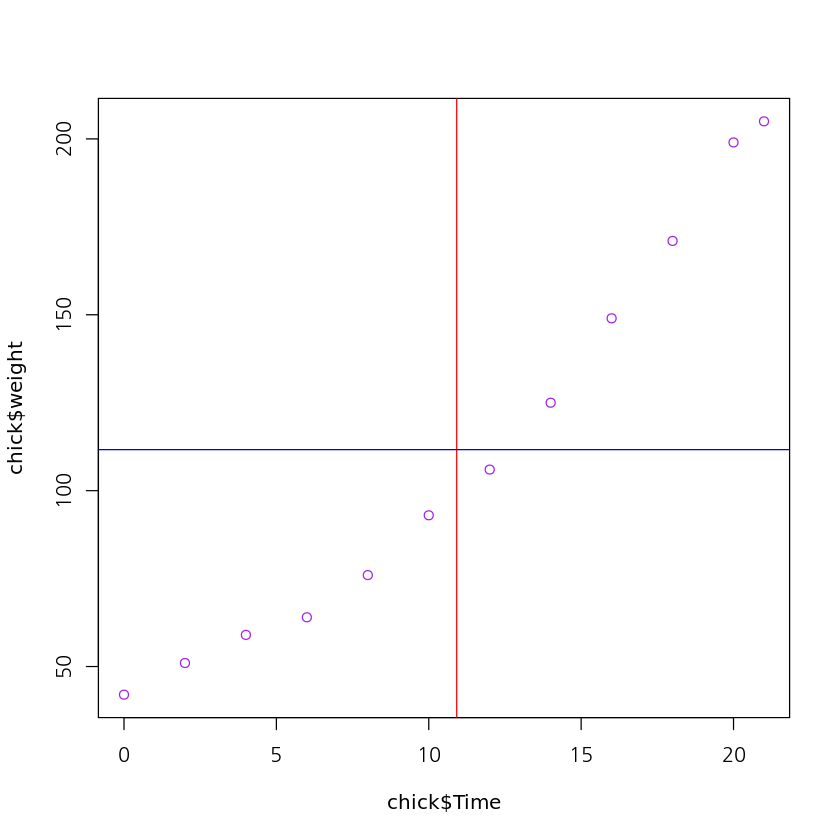

In [46]:
plot(chick$Time, chick$weight, col='purple')
abline(v=mean(chick$Time), col='red')
abline(h=mean(chick$weight), col='blue')

In [47]:
cor(chick$Time, chick$weight)
cov(chick$Time, chick$weight)

[1] 0.9791822

[1] 400.0606

In [48]:
cor.test(chick$Time, chick$weight)


	Pearson's product-moment correlation

data:  chick$Time and chick$weight
t = 15.255, df = 10, p-value = 2.974e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9252014 0.9943209
sample estimates:
      cor 
0.9791822 



Call:
lm(formula = weight ~ Time, data = chick)

Coefficients:
(Intercept)         Time  
     24.465        7.988  


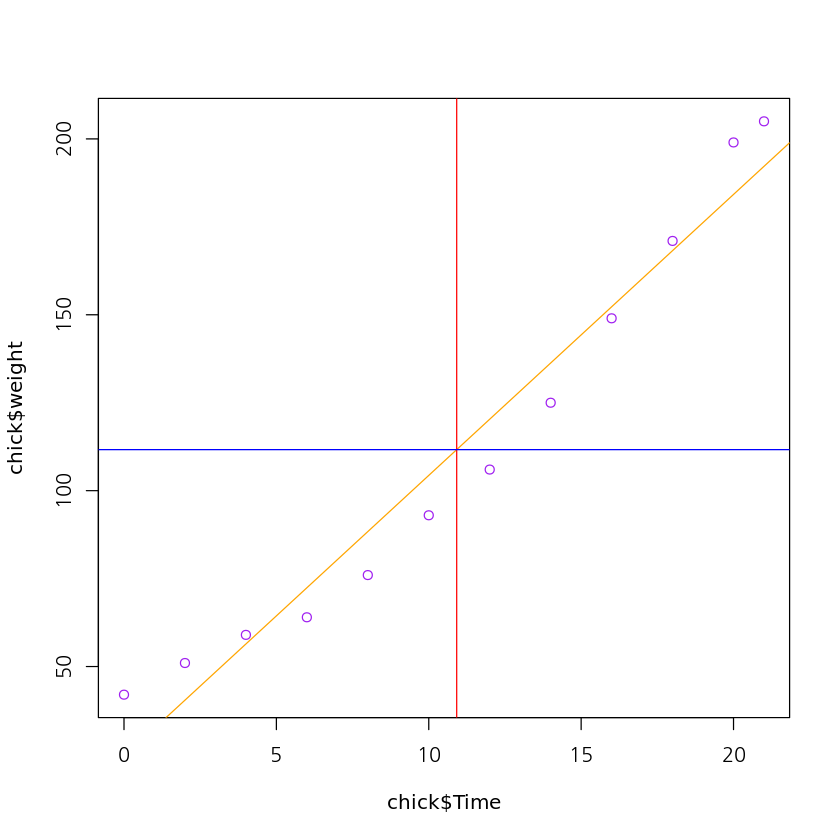

In [81]:
lm(weight~ Time, chick)
plot(chick$Time, chick$weight, col='purple')
abline(lm(chick$weight~ chick$Time), col='orange')
abline(v=mean(chick$Time), col = 'red')
abline(h=mean(chick$weight), col= 'blue')

$ \hat y = 7.988x + 24.465 + \epsilon $

In [61]:
install.packages('corrplot')

Installing package into ‘/home/hadoop/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [62]:
library(corrplot)

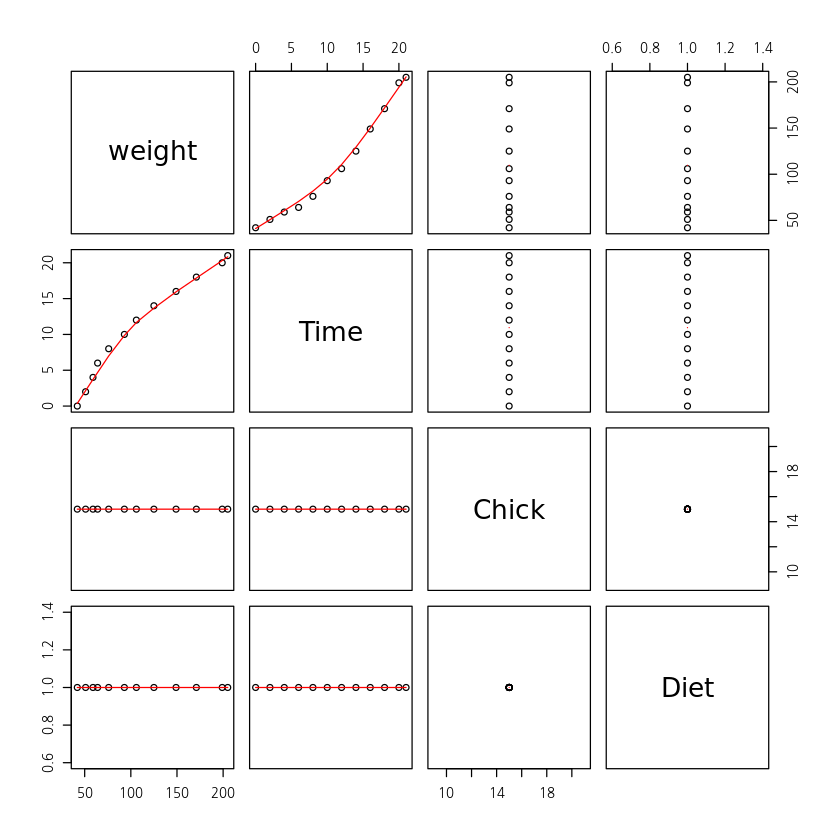

In [67]:
pairs(chick, panel=panel.smooth)

In [75]:
### 회귀식 평가
# 전화횟수 대비 판매량에 대한 회귀식
y = 0.26*84 + 19.98
y
# 실제값 : 43 -> 30
# 이 방정식은 믿을만한가?
# 회귀모형 model 분석 필요

[1] 41.82

#### lm함수로 회귀식 계산 후 summary함수로 출력하면 회귀모형 평가 결과 출력

In [76]:
model <- lm(s~p)
summary(model)    # Residuals: 잔차 


Call:
lm(formula = s ~ p)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.873  -2.861   0.255   3.511  10.595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.9800     4.3897   4.552 0.000544 ***
p             0.2606     0.0420   6.205 3.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.72 on 13 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7282 
F-statistic:  38.5 on 1 and 13 DF,  p-value: 3.193e-05


### 분석결과 이해하기
#### 1. 결정계수 R^2 : R-squared : 0.7476 <- 0.75보다 작으므로 모형 재고 필요
+ 회귀모형이 나름의 의미가 존재하는지 여부 파악
+ 회귀선과 실제 데이터가 얼마나 가깝게 분포하는가

#### 2. 회귀계수의 유의성 : F-statistic, p-value
+ F검정을 통해 회귀계수 유무 파악
+ 귀무가설 : 회귀계수 개수가 0
+ 대립가설 : 회귀계수 개수가 0이 아님

#### 3. 각 회귀계수별 유의성 : Coefficients -> Pr(>|t|)
+ t 검정을 통해 각 회귀계수 유무 파악
+ 귀무가설 : 회귀계수가 유의하지 않다
+ 대립가설 : 회귀계수가 유의하다

In [77]:
model <- lm(cars$dist~cars$speed)
summary(model)  


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [ ]:
# R^2 : 0.6511 -> 0.75보다 많이 낮으므로 모형 재고 필요
# F-statistic - pvalue : 1.49e-12 -> 0.05보다 훨씬 작음. 귀무가설 기각
# signif. code : *의 개수에 따른 영역. *이 없을 경우 귀무가설 기각불가 가능성이 높음
# Pr(>|t|) : 

In [79]:
model <- lm(weight~ Time, chick)
summary(model)


Call:
lm(formula = weight ~ Time, data = chick)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636  0.00456 ** 
Time          7.9879     0.5236  15.255 2.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 2.974e-08


In [ ]:
# R^2 : 0.9588 -> 0.75보다 높으므로 설득력 있는 모형
# F-statistic - pvalue : 2.974e-08 -> 0.05보다 훨씬 작음. 귀무가설 기각
# Pr(>|t|) : 0.00456
# Residuals(잔차) -> 잔차는 있는 편

## 선형회귀linear regression

### 데이터들 사이의 상관관계 또는 추이를 예측하거나 대상값 자체를 예측하는 지도학습 알고리즘

+ 예를 들어, 방의 갯수와 집값의 상관관계 또는 과거 10년간의 영업실적을 분석하여 미래의 영업실적을 예측하는 것

#### 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로 하여 하나의 n차 선형방정식으로 변수관계를 일반화하는 분석방법
+ 하나의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 '단순 선형회귀'라 하고 둘 이상의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 '다중 선형회귀'라 함

### 선형성linearity

#### 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것


### 회귀분석의 중요 개념

+ 선형방정식 : 두 변수간의 관계를 방정식으로 표현

+  기울기 : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악

+ 절편 : 회귀선을 얼마나 위/아래로 평행이동시키는지 파악

In [84]:
# 공부시간 대비 성적을 단순선형회귀를 이용해서 예측

time <- c(2,4,6,8)            # 독립변수 x

jumsu = c(81,93,91,97)       # 종속변수 y

# 만약, 5/10 시간 공부시 예상 성적은?



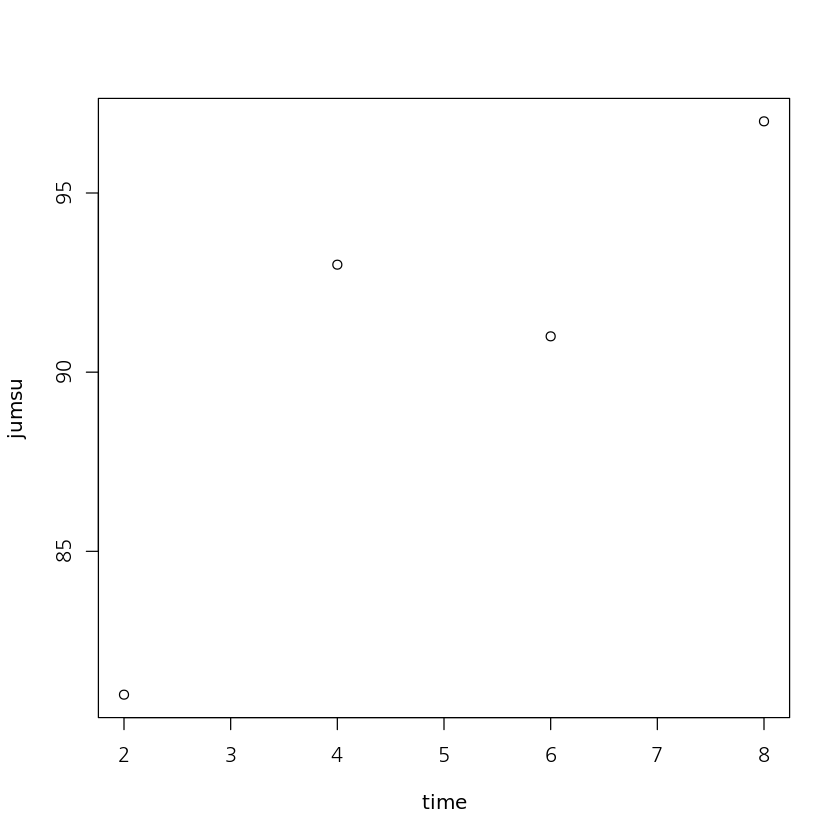

In [85]:
plot(time, jumsu)

### 기울기 = (x - x평균)*(y - y평균)의 총합 / (x - x평균)^2의 총합
### 절편 = y평균 - (x평균 * 기울기)


In [87]:
mx <- mean(time)
my <- mean(jumsu)

In [91]:
sprintf('%.1f %.1f', mx, my)

[1] "5.0 90.5"

In [102]:
divtop1 <- sum((time - mx)^2)# 분모
divsor1 <- sum((time - mx)*(jumsu - my))# 분자



divsor1 / divtop1

inter <- my - (mx * (divsor1 / divtop1))

inter

[1] 2.3

[1] 79

In [104]:
divisor <- 0
for (i in 1:4) {
    divisor <- divisor + ((time[i] -mx) ^2)
}
divisor

[1] 20

In [113]:
# 최소제곱법 중 분모에 해당하는 값 계산용 함수
# (x - x평균)^2의 총합
dividen <- function(x, mx, y, my) {
    sums <- 0
    for (i in 1:4) {
        sums <- sums + ((x[i] - mx) * (y[i] - my))
    }
    return(sums)
}

In [114]:
divtop <- dividen(time, mx, jumsu, my)
divtop # 분모

[1] 46

In [115]:
a = divtop / divisor
a

[1] 2.3

In [118]:
b = my - (mx *a)
b

[1] 79

In [92]:
model <- lm(jumsu~time)
summary(model)


Call:
lm(formula = jumsu ~ time)

Residuals:
   1    2    3    4 
-2.6  4.8 -1.8 -0.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   79.000      4.990  15.832  0.00397 **
time           2.300      0.911   2.525  0.12756   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.074 on 2 degrees of freedom
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.6417 
F-statistic: 6.373 on 1 and 2 DF,  p-value: 0.1276


In [94]:
# time(2.3) - 기울기, intercept(절편) - 79.000


### 선형회귀식을 이용해서 회귀직선 그리기

In [97]:
z <- c(0,0,0,0) # 예측값
for (i in 1:4) {
    z[i] <- (2.3 * time[i] + 79)
}

z
jumsu

[1] 83.6 88.2 92.8 97.4

[1] 81 93 91 97

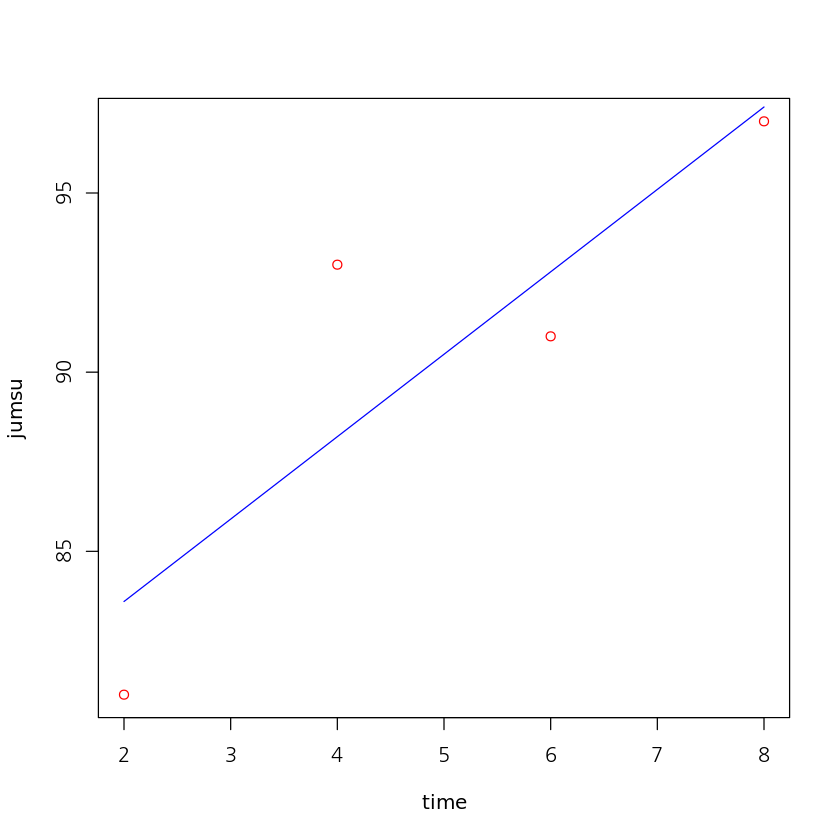

In [101]:
plot(time, jumsu, col='red')
lines(time, z, col='blue')

In [ ]:
2.3 * 5 + 79

In [125]:
delivery<- read.csv('delivery.txt')

In [126]:
delivery

X100,X20
<int>,<int>
150,24
300,36
400,47
130,22
240,32
350,47
200,42
100,21
110,21


In [146]:
cor(delivery$X100, delivery$X20)

[1] 0.8886267

In [147]:
cor.test(delivery$X100, delivery$X20)


	Pearson's product-moment correlation

data:  delivery$X100 and delivery$X20
t = 6.7119, df = 12, p-value = 2.159e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6774617 0.9644707
sample estimates:
      cor 
0.8886267 


In [130]:
lm(delivery$X20~delivery$X100)


Call:
lm(formula = delivery$X20 ~ delivery$X100)

Coefficients:
  (Intercept)  delivery$X100  
     11.48098        0.09177  


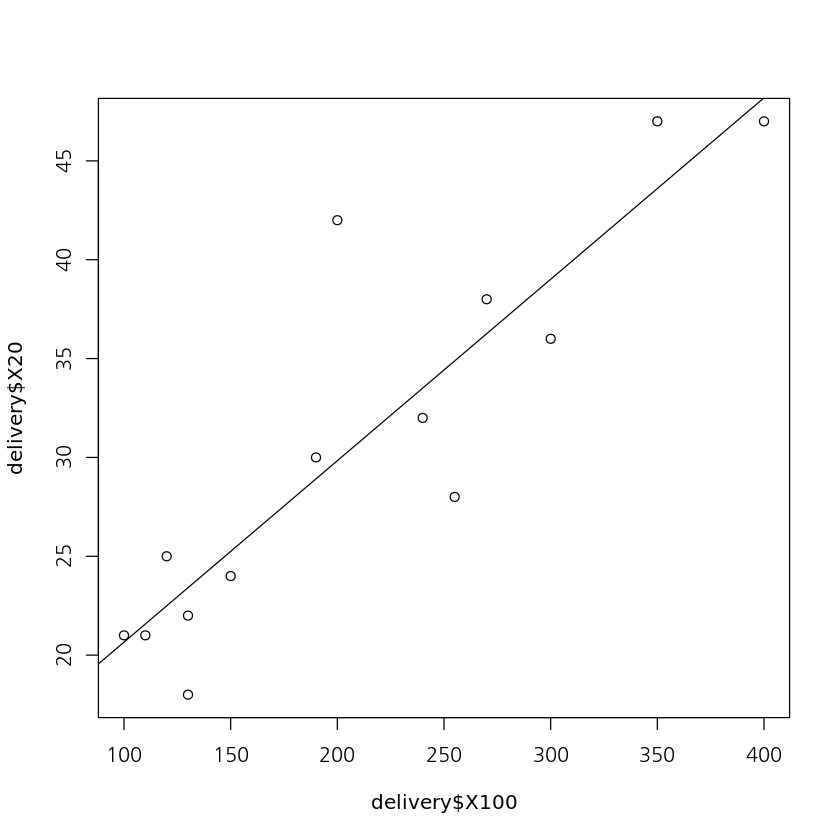

In [131]:
plot(delivery$X100, delivery$X20)
abline(lm(delivery$X20~delivery$X100))

In [133]:
model1 <- lm(delivery$X20~delivery$X100)
summary(model1)


Call:
lm(formula = delivery$X20 ~ delivery$X100)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8826 -1.4824 -0.8826  1.5762 12.1648 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.48098    3.13695   3.660  0.00327 ** 
delivery$X100  0.09177    0.01367   6.712 2.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.685 on 12 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7721 
F-statistic: 45.05 on 1 and 12 DF,  p-value: 2.159e-05


In [135]:
m100 <- mean(delivery$X100)
m20 <- mean(delivery$X20)

In [136]:
divtop3 <- sum((delivery$X100 - m100)^2)# 분모
divsor3 <- sum((delivery$X100 - m100)*(delivery$X20 - m20))# 분자



divsor3 / divtop3

inter3 <- m20 - (m100 * (divsor3 / divtop3))

inter3

[1] 0.09177122

[1] 11.48098

In [138]:
str(delivery)

'data.frame':	14 obs. of  2 variables:
 $ X100: int  150 300 400 130 240 350 200 100 110 190 ...
 $ X20 : int  24 36 47 22 32 47 42 21 21 30 ...


In [148]:
divisor4 <- 0
for (i in 1:13) {
    divisor4 <- divisor4 + ((delivery$X100[i] -m100) ^2)
}
divisor4

[1] 115430.2

In [149]:
# 최소제곱법 중 분모에 해당하는 값 계산용 함수
# (x - x평균)^2의 총합
dividen4 <- function(x, m100, y, m20) {
    sums4 <- 0
    for (i in 1:13) {
        sums4 <- sums4 + ((x[i] - m100) * (y[i] - m20))
    }
    return(sums4)
}

In [150]:
divtop4 <- dividen4(delivery$X100, m100, delivery$X20, m20)
divtop4 # 분모

[1] 10900.43

In [151]:
divisor4 / divtop4

[1] 10.58951

In [154]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


In [156]:
cor(women$height, women$weight)

[1] 0.9954948

In [157]:
cor.test(women$height, women$weight)


	Pearson's product-moment correlation

data:  women$height and women$weight
t = 37.855, df = 13, p-value = 1.091e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9860970 0.9985447
sample estimates:
      cor 
0.9954948 


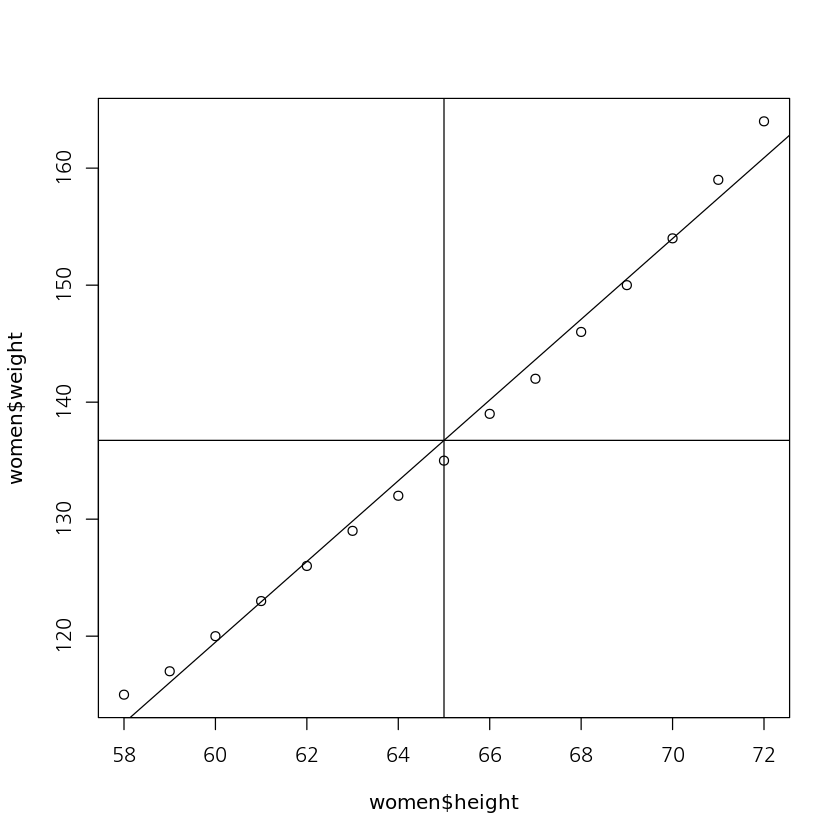

In [158]:
plot(women$height, women$weight)
abline(lm(weight~height, women))
abline(v=mean(women$height))
abline(h=mean(women$weight))

In [159]:
model5<- lm(weight~height, women)
summary(model5)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [161]:
mh <- mean(women$height)
mw <- mean(women$weight)

In [162]:
divtop5 <- sum((women$height - mh)^2)# 분모
divsor5 <- sum((women$height - mh)*(women$weight - mw))# 분자



divsor5 / divtop5

inter5 <- mw - (mh * (divsor5 / divtop5))

inter5

[1] 3.45

[1] -87.51667